In [101]:
import tensorflow as tf
import tensorflow.keras as keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [102]:
train_csv = pd.read_csv('datasets/Train.csv')
test_csv = pd.read_csv('datasets/Test.csv')

In [103]:
train_csv.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


In [104]:
train_csv.index = train_csv['Path']
train_csv.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
Path,,,,,,,,
Train/20/00020_00000_00000.png,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
Train/20/00020_00000_00001.png,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
Train/20/00020_00000_00002.png,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
Train/20/00020_00000_00003.png,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
Train/20/00020_00000_00004.png,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


In [105]:
train_csv.loc['Train/20/00020_00000_00001.png']['ClassId']

20

In [106]:
train_csv = train_csv['ClassId']
train_csv.head()

Path
Train/20/00020_00000_00000.png    20
Train/20/00020_00000_00001.png    20
Train/20/00020_00000_00002.png    20
Train/20/00020_00000_00003.png    20
Train/20/00020_00000_00004.png    20
Name: ClassId, dtype: int64

In [107]:
train_csv.loc['Train/20/00020_00000_00001.png']

20

In [108]:
type(train_csv)

pandas.core.series.Series

In [109]:
test_csv.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


In [110]:
test_csv.index = test_csv['Path']
test_csv = test_csv['ClassId']
test_csv.head()

Path
Test/00000.png    16
Test/00001.png     1
Test/00002.png    38
Test/00003.png    33
Test/00004.png    11
Name: ClassId, dtype: int64

In [111]:
import os
def find_average_dimention(data):
    x , y = [], []
    pwd = os.getcwd()+"\\datasets\\"+data
    for dir1 in os.listdir(pwd):
        if dir1.endswith('.png'):            
            sh = cv2.imread('datasets/'+data+'/'+dir1).shape
            x.append(sh[0])
            y.append(sh[1])
        else:
            for dir2 in os.listdir(pwd+'\\'+dir1):                            
                sh = cv2.imread('datasets/'+data+'/'+dir1+'/'+dir2).shape
                x.append(sh[0])
                y.append(sh[1])
    print(np.average(x), np.average(y))
    return int(np.round(np.average(x))), int(round(np.average(y)))

In [112]:
from sklearn.utils import shuffle
import cv2
def create_dataset(data, csv):
    X = []
    y = []
    pwd = os.getcwd()+"\\datasets\\"+data
    for dir1 in os.listdir(pwd):
        if dir1.endswith('.png'):            
            img = cv2.imread('datasets/'+data+'/'+dir1, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img,(ydim, xdim))
            img = np.array(img)
            img = img.astype('float32')
            img /= 255
            X.append(img)
            y.append(csv.loc[data+'/'+dir1])
        else:
            for dir2 in os.listdir(pwd+'\\'+dir1):            
                img = cv2.imread('datasets/'+data+'/'+dir1+'/'+dir2, cv2.COLOR_BGR2RGB)
                img = cv2.resize(img,(ydim, xdim))
                img = np.array(img)
                img = img.astype('float32')
                img /= 255
                X.append(img)
                y.append(csv.loc[data+'/'+dir1+'/'+dir2])                   # y.append(dir1) <-- this can also be done
#     print(X[0])
    return shuffle(np.array(X), np.array(y))        #tf.convert_to_tensor(X)#, tf.convert_to_tensor(y)

## Creating Training and Testing Dataset

In [113]:
xdim , ydim = find_average_dimention('Train')

import csv
with open('model_experiments/variable_values.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerows([['Variable Name', 'Value'], ['xdim', xdim], ['ydim', ydim]])

50.328929582493814 50.83587951745773


In [114]:
xdim, ydim

(50, 51)

In [115]:
train_X, train_y = create_dataset('Train', train_csv)
test_X, test_y= create_dataset('Test', test_csv)

In [116]:
type(train_X)

numpy.ndarray

In [117]:
train_X.shape, train_y.shape, test_X.shape, test_y.shape

((39209, 50, 51, 3), (39209,), (12630, 50, 51, 3), (12630,))

In [119]:
# data_X = np.

## Building Model

In [120]:
def create_model_checkpoint(model_name, save_path='model_experiments'):
    return keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), monitor='accuracy', mode='max', 
                                          verbose=0, save_best_only=True)

In [127]:
model = keras.Sequential([
    keras.layers.Conv2D(filters=128, kernel_size=(5,5), input_shape=(xdim, ydim, 3)),  # 32
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),      # 32
    keras.layers.MaxPooling2D(pool_size=(3,3)),   # (2,2)
    keras.layers.Dropout(rate=0.25),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'), #  64
    keras.layers.Conv2D(filters=64, kernel_size=(2,2), activation='relu'), #  64
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(rate=0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(512,activation='relu'),
    keras.layers.Dropout(rate=0.5),
    keras.layers.Dense(256,activation='relu'),
    keras.layers.Dropout(rate=0.25),
    keras.layers.Dense(len(set(train_csv.values)), activation='softmax')
],name='road_sign_detection_model')

model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

model.summary()

Model: "road_sign_detection_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_55 (Conv2D)          (None, 46, 47, 128)       9728      
                                                                 
 conv2d_56 (Conv2D)          (None, 44, 45, 128)       147584    
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 14, 15, 128)      0         
 g2D)                                                            
                                                                 
 dropout_13 (Dropout)        (None, 14, 15, 128)       0         
                                                                 
 conv2d_57 (Conv2D)          (None, 12, 13, 64)        73792     
                                                                 
 conv2d_58 (Conv2D)          (None, 11, 12, 64)        16448     
                                         

In [128]:
history = model.fit(x=train_X, y=train_y, epochs=10, verbose=1, batch_size=256, callbacks=[create_model_checkpoint(model.name)])

Epoch 1/10
154/154 [==============================] - 2451s 16s/step - loss: 2.0698 - accuracy: 0.4109
Epoch 2/10
154/154 [==============================] - 2347s 15s/step - loss: 0.3403 - accuracy: 0.8930
Epoch 3/10
154/154 [==============================] - 2370s 15s/step - loss: 0.1396 - accuracy: 0.9579
Epoch 4/10
154/154 [==============================] - 2584s 17s/step - loss: 0.1008 - accuracy: 0.9695
Epoch 5/10
154/154 [==============================] - 31281s 204s/step - loss: 0.0698 - accuracy: 0.9790
Epoch 6/10
154/154 [==============================] - 4076s 26s/step - loss: 0.0482 - accuracy: 0.9853
Epoch 7/10
154/154 [==============================] - 3291s 21s/step - loss: 0.0451 - accuracy: 0.9872
Epoch 8/10
154/154 [==============================] - 11529s 75s/step - loss: 0.0539 - accuracy: 0.9850
Epoch 9/10
154/154 [==============================] - 5869s 38s/step - loss: 0.0365 - accuracy: 0.9898
Epoch 10/10
154/154 [==============================] - 9591s 62s/step 

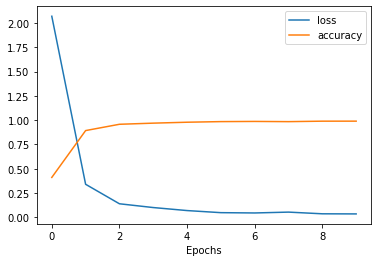

In [129]:
pd.DataFrame(history.history).plot()
plt.xlabel('Epochs')
plt.show()

In [130]:
from keras.models import load_model
saved_model = load_model('model_experiments/'+model.name)
saved_model.evaluate(test_X, test_y)

395/395 [==============================] - 243s 614ms/step - loss: 0.1105 - accuracy: 0.9762


[0.11045515537261963, 0.9762470126152039]

In [131]:
preds = saved_model.predict(test_X)

pred_y = []
for pred in preds:
    pred_y.append(np.argmax(pred))
pred_y = np.array(pred_y)

In [132]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y, pred_y)

array([[ 59,   0,   0, ...,   0,   0,   0],
       [  0, 703,   2, ...,   0,   0,   0],
       [  0,   8, 741, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,  85,   0,   0],
       [  0,   0,   0, ...,   0,  50,   0],
       [  0,   0,   0, ...,   0,   3,  86]], dtype=int64)

In [126]:
import os
data = pd.read_csv(os.path.join(os.getcwd(),'model_experiments','variable_values.csv'))
data

,Variable Name,Value
0,xdim,50
1,ydim,51


In [72]:
pred_y[3431]

12

In [67]:
np.argmax(pred_y[31])

0

In [71]:
test_y[3431]

12